In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-data/world.sqlite


In [2]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('/kaggle/input/world-data/world.sqlite')

# Retrieve a list of tables in the database
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(query_tables).fetchall()
tables = [table[0] for table in tables]
tables


['world']

In [3]:
# Preview the first few rows of the 'world' table
query_preview = "SELECT * FROM world LIMIT 5;"
preview_data = conn.execute(query_preview).fetchall()

# Correcting the error and retrieving column names from the executed query
cursor = conn.execute(query_preview)
column_names = [description[0] for description in cursor.description]

preview_data, column_names


([('Afghanistan',
   '60',
   'AF',
   '58.1',
   '652230',
   '323000',
   '32.49',
   '93',
   'Kabul',
   '8672',
   '149.9',
   '2.3',
   'AFN',
   '4.47',
   '2.1',
   '0.7',
   '19101353833',
   '104',
   '9.7',
   '47.9',
   'Kabul',
   '64.5',
   '638',
   '0.43',
   'Pashto',
   '78.4',
   '0.28',
   '38041754',
   '48.9',
   '9.3',
   '71.4',
   '11.12',
   '9797273',
   '33.93911',
   '67.709953'),
  ('Albania',
   '105',
   'AL',
   '43.1',
   '28748',
   '9000',
   '11.78',
   '355',
   'Tirana',
   '4536',
   '119.05',
   '1.4',
   'ALL',
   '1.62',
   '28.1',
   '1.36',
   '15278077447',
   '107',
   '55',
   '7.8',
   'Tirana',
   '78.5',
   '15',
   '1.12',
   'Albanian',
   '56.9',
   '1.2',
   '2854191',
   '55.7',
   '18.6',
   '36.6',
   '12.33',
   '1747593',
   '41.153332',
   '20.168331'),
  ('Algeria',
   '18',
   'DZ',
   '17.4',
   '2381741',
   '317000',
   '24.28',
   '213',
   'Algiers',
   '150006',
   '151.36',
   '2',
   'DZD',
   '3.02',
   '0.8',
   '

* Country: Name of the country.
* Density: Population density.
* Abbreviation: Abbreviation of the country's name.
* AgriculturalLand: Percentage of land used for agriculture.
* LandArea: Total land area in square kilometers.
* ArmedForcesSize: Size of the armed forces.
* BirthRate: Birth rate per 1000 individuals.
* CallingCode: International calling code.
* Capital: Capital city of the country.
* Co2-Emissions: Carbon dioxide emissions.
* CPI: Consumer Price Index.
* CPIChange: Change in Consumer Price Index.
* Currency-Code: Currency code.
* FertilityRate: Fertility rate.
* ForestedArea: Percentage of land that is forested.
* GasolinePrice: Price of gasoline per liter.
* GDP: Gross Domestic Product.
* GrossPrimaryEducationEnrollment: Gross enrollment ratio for primary education.
* GrossTertiaryEducationEnrollment: Gross enrollment ratio for tertiary education.
* InfantMortality: Infant mortality rate.
* LargestCity: Largest city of the country.
* LifeExpectancy: Average life expectancy.
* MaternalMortalityRatio: Maternal mortality ratio per 100,000 live births.
* MinimumWage: Minimum wage.
* OfficialLanguage: Official language of the country.
* OutOfPocketHealthExpenditure: Percentage of health expenditure paid out-of-pocket.
* PhysiciansPerThousand: Number of physicians per 1,000 individuals.
* Population: Total population.
* PopulationLaborForceParticipation: Percentage of the population in the labor force.
* TaxRevenue: Tax revenue as a percentage of GDP.
* TotalTaxRate: Total tax rate.
* UnemploymentRate: Unemployment rate.
* Urban_population: Urban population.
* Latitude: Latitude of the country.
* Longitude: Longitude of the country.

/tmp/ipykernel_20/3795865129.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


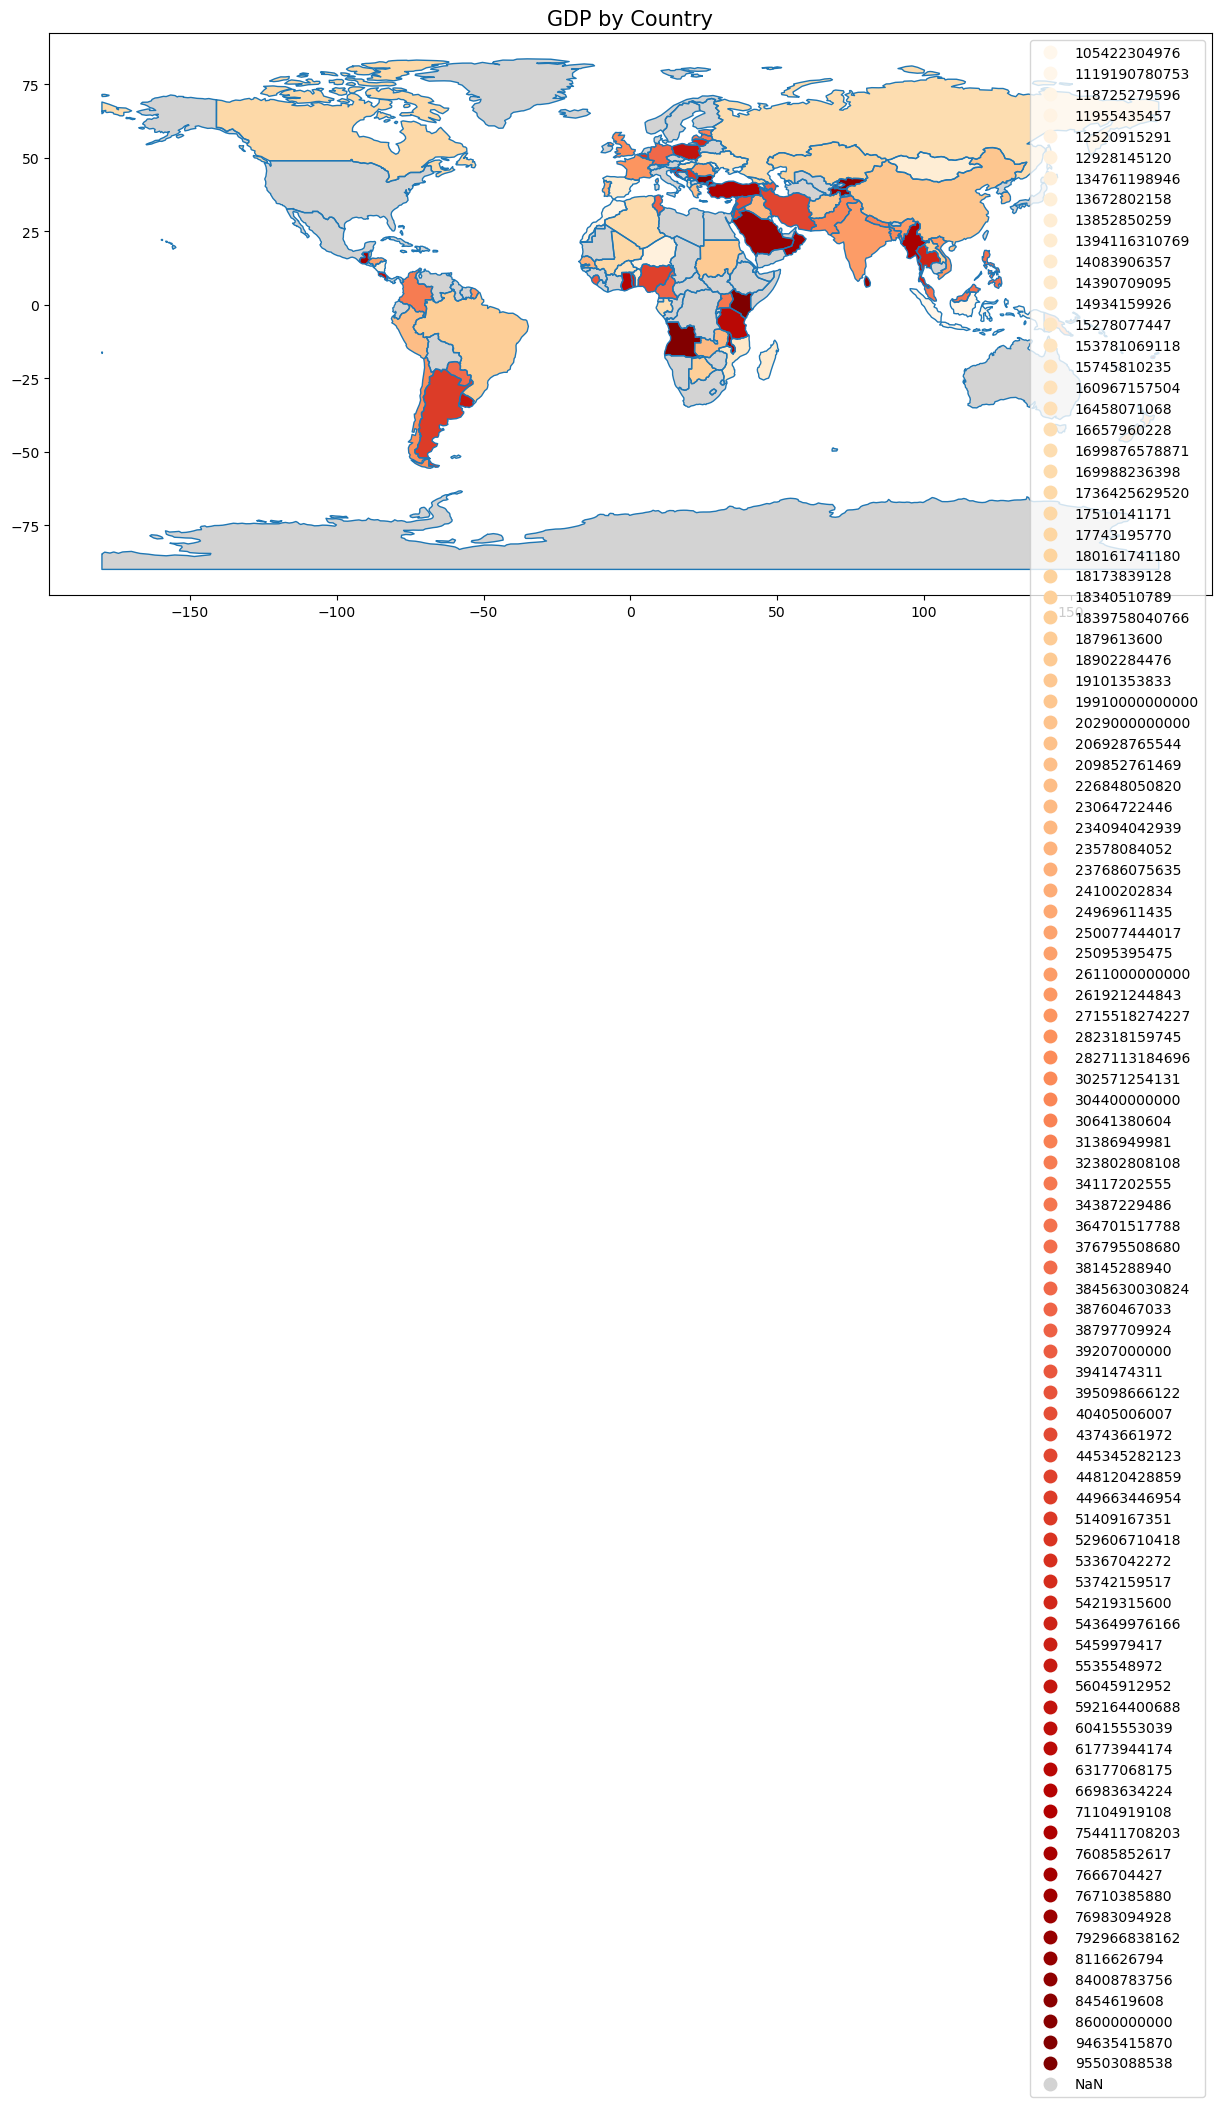

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Retrieve GDP and country data from the SQLite database
query_gdp = "SELECT Country, GDP FROM world;"
gdp_data = conn.execute(query_gdp).fetchall()
gdp_df = pd.DataFrame(gdp_data, columns=["country", "gdp"])

# Merge the world map data with our GDP data
merged = world_map.set_index('name').join(gdp_df.set_index('country'))

# Plot

# Convert the GDP data into a pandas DataFrame
gdp_df = pd.DataFrame(gdp_data, columns=["country", "gdp"])

# Merge the world map data with our GDP data
merged = world_map.set_index('name').join(gdp_df.set_index('country'))


# Plot without the problematic legend_kwds
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_map.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='gdp', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})
plt.title('GDP by Country', fontsize=15)
plt.show()


> Choropleth map visualizing the Gross Domestic Product (GDP) by country. The darker shades indicate higher GDP values, while the lighter shades represent lower GDP values. Countries with no data available are colored in light grey.

> From the map, it's evident that countries like the USA, China, and some Western European nations have high GDPs, which is reflected by their darker shades.

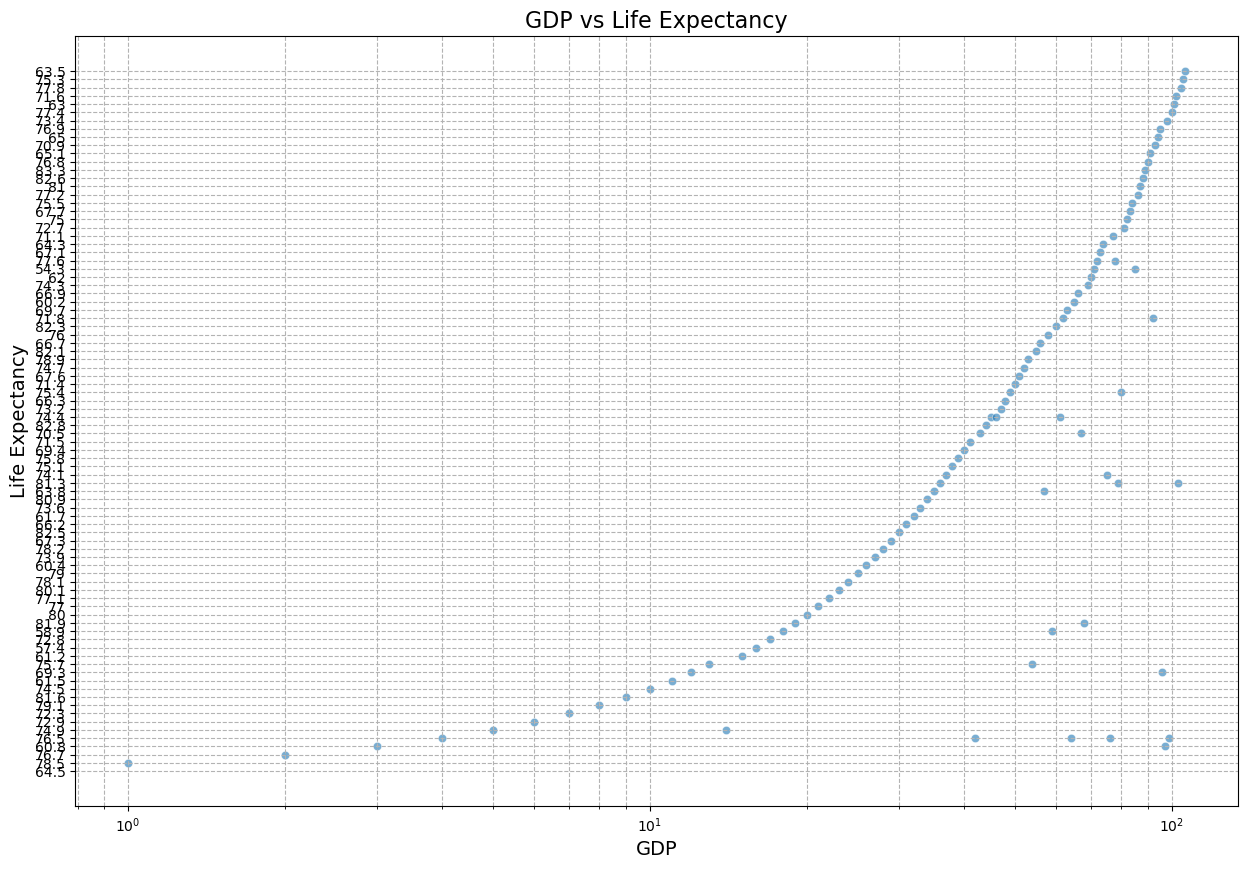

In [5]:
# Retrieve GDP and life expectancy data from the SQLite database
query_gdp_life_expectancy = "SELECT GDP, LifeExpectancy FROM world;"
gdp_life_data = conn.execute(query_gdp_life_expectancy).fetchall()
gdp_life_df = pd.DataFrame(gdp_life_data, columns=["gdp", "life_expectancy"])

# Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(gdp_life_df["gdp"], gdp_life_df["life_expectancy"], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("GDP vs Life Expectancy", fontsize=16)
plt.xlabel("GDP", fontsize=14)
plt.ylabel("Life Expectancy", fontsize=14)
plt.xscale('log')
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()


**scatter plot showing the relationship between GDP and life expectancy for different countries.**


**Observations:**

* Generally, there seems to be a positive correlation between GDP and life expectancy. This means that countries with a higher GDP tend to have higher life expectancies.
* There are some outliers, indicating countries with high GDP but relatively lower life expectancy or vice versa.

In [6]:
import plotly.graph_objects as go

# Retrieve necessary data from the SQLite database
query_data = "SELECT GDP, LifeExpectancy, InfantMortality, UnemploymentRate FROM world;"
data = conn.execute(query_data).fetchall()
df = pd.DataFrame(data, columns=["gdp", "life_expectancy", "infant_mortality", "unemployment_rate"])

# Define the scatter plot for each indicator
trace1 = go.Scatter(x=df['gdp'], y=df['life_expectancy'], mode='markers', name='Life Expectancy')
trace2 = go.Scatter(x=df['gdp'], y=df['infant_mortality'], mode='markers', name='Infant Mortality', visible=False)
trace3 = go.Scatter(x=df['gdp'], y=df['unemployment_rate'], mode='markers', name='Unemployment Rate', visible=False)

data = [trace1, trace2, trace3]

# Define the dropdown menu
buttons = [
    dict(label="Life Expectancy", method="update",
         args=[{"visible": [True, False, False]}, {"title": "GDP vs Life Expectancy"}]),
    dict(label="Infant Mortality", method="update",
         args=[{"visible": [False, True, False]}, {"title": "GDP vs Infant Mortality"}]),
    dict(label="Unemployment Rate", method="update",
         args=[{"visible": [False, False, True]}, {"title": "GDP vs Unemployment Rate"}])
]

# Define the layout
layout = go.Layout(title="GDP vs Selected Indicator",
                   xaxis=dict(title="GDP", type='log'),
                   yaxis=dict(title="Selected Indicator"),
                   updatemenus=[{"buttons": buttons, "direction": "down", "showactive": True}])

# Plot
fig = go.Figure(data=data, layout=layout)
fig.show()


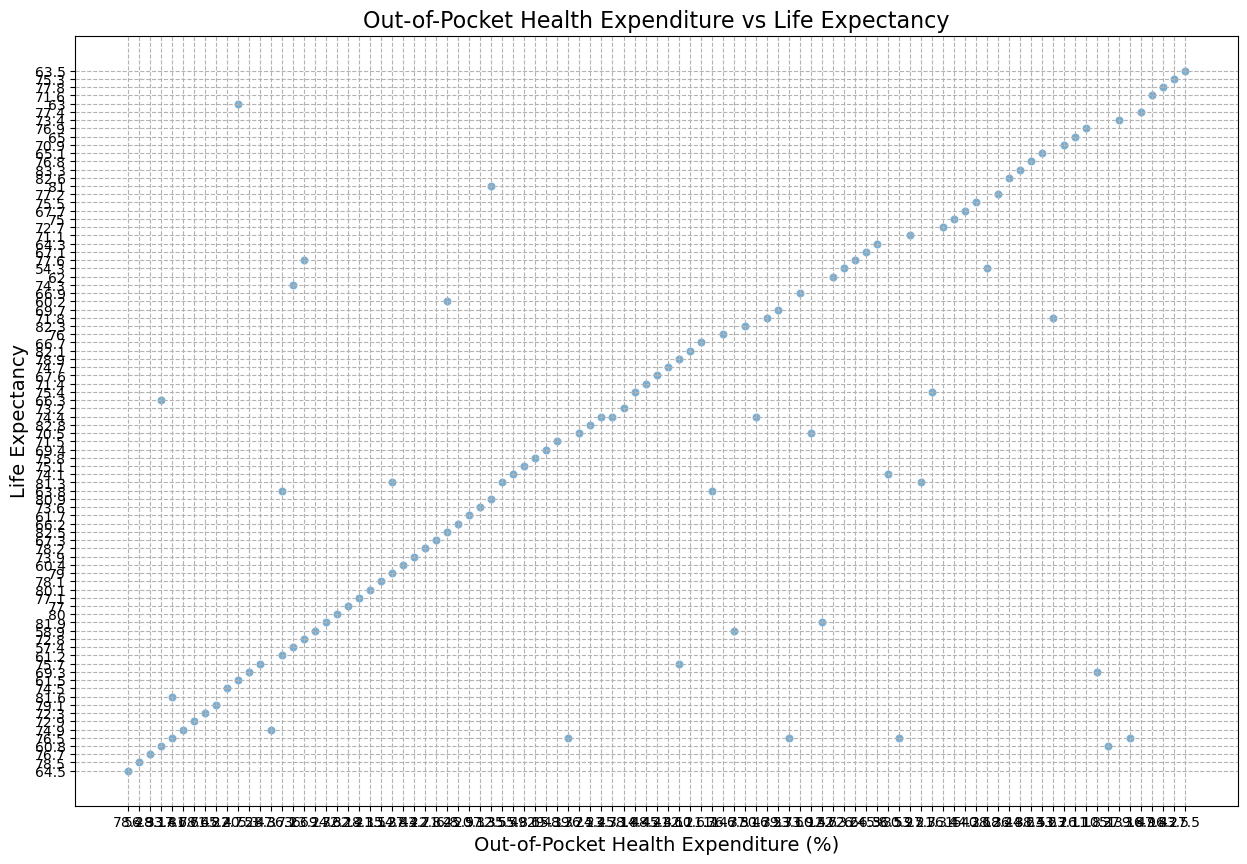

In [7]:
# Retrieve necessary data for out-of-pocket health expenditure vs. life expectancy
query_health = "SELECT OutOfPocketHealthExpenditure, LifeExpectancy FROM world;"
health_data = conn.execute(query_health).fetchall()
health_df = pd.DataFrame(health_data, columns=["out_of_pocket_health_exp", "life_expectancy"])

# Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(health_df["out_of_pocket_health_exp"], health_df["life_expectancy"], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Out-of-Pocket Health Expenditure vs Life Expectancy", fontsize=16)
plt.xlabel("Out-of-Pocket Health Expenditure (%)", fontsize=14)
plt.ylabel("Life Expectancy", fontsize=14)
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()


**scatter plot visualizing the relationship between out-of-pocket health expenditure (as a percentage of total health expenditure) and life expectancy for different countries.**

**Observations:**

* There doesn't seem to be a strong linear correlation between out-of-pocket health expenditure and life expectancy.
* Many countries with a wide range of out-of-pocket health expenditures have high life expectancies.
* However, some countries with high out-of-pocket health expenditures have lower life expectancies. This could suggest that in some regions, high out-of-pocket costs might be a barrier to accessing necessary healthcare, leading to lower life expectancies.

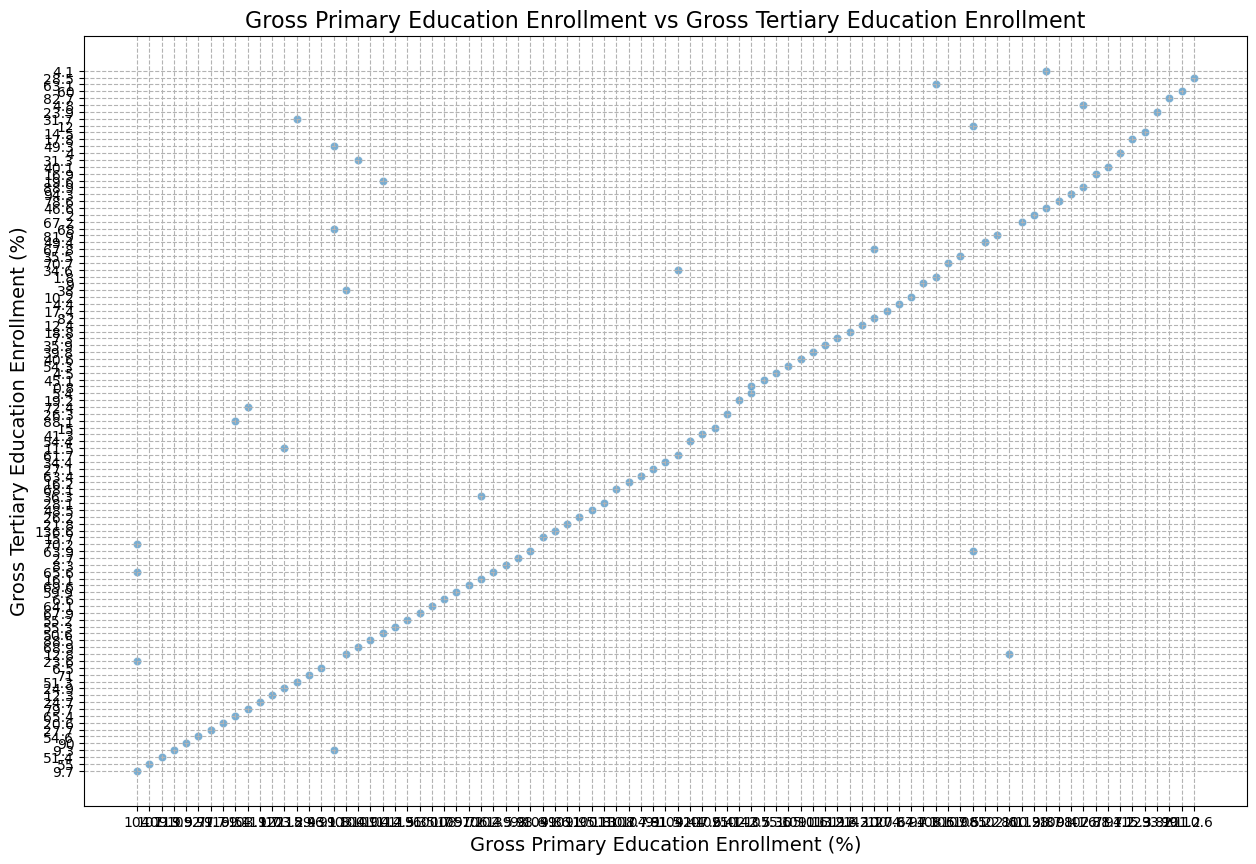

In [8]:
# Retrieve necessary data for Gross Primary Education Enrollment vs. Gross Tertiary Education Enrollment
query_education = "SELECT GrossPrimaryEducationEnrollment, GrossTertiaryEducationEnrollment FROM world;"
education_data = conn.execute(query_education).fetchall()
education_df = pd.DataFrame(education_data, columns=["primary_enrollment", "tertiary_enrollment"])

# Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(education_df["primary_enrollment"], education_df["tertiary_enrollment"], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Gross Primary Education Enrollment vs Gross Tertiary Education Enrollment", fontsize=16)
plt.xlabel("Gross Primary Education Enrollment (%)", fontsize=14)
plt.ylabel("Gross Tertiary Education Enrollment (%)", fontsize=14)
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()


**scatter plot visualizing the relationship between Gross Primary Education Enrollment and Gross Tertiary Education Enrollment for different countries.**

**Observations:**

* Many countries have high enrollment rates in both primary and tertiary education, suggesting a strong educational foundation from early on and continued emphasis on higher education.
* Some countries have high primary education enrollment but relatively lower tertiary education enrollment. This could indicate challenges in transitioning from primary to tertiary education, or it might reflect cultural, economic, or policy-driven priorities.
* A few countries have low enrollment in both primary and tertiary education, pointing to potential areas of concern in their educational systems.

In [9]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

query_map_data = """SELECT Country, Abbreviation, GDP, LifeExpectancy, InfantMortality, 
                          UnemploymentRate, `Co2-Emissions`, Latitude, Longitude 
                   FROM world;"""
map_data = conn.execute(query_map_data).fetchall()

# Convert the data to a DataFrame
map_df = pd.DataFrame(map_data, columns=["country", "country_code", "gdp", "life_expectancy", 
                                         "infant_mortality", "unemployment_rate", 
                                         "co2_emissions", "latitude", "longitude"])

# Convert the relevant columns to numeric for visualization
map_df['gdp'] = pd.to_numeric(map_df['gdp'], errors='coerce')
map_df['life_expectancy'] = pd.to_numeric(map_df['life_expectancy'], errors='coerce')
map_df['infant_mortality'] = pd.to_numeric(map_df['infant_mortality'], errors='coerce')
map_df['unemployment_rate'] = pd.to_numeric(map_df['unemployment_rate'], errors='coerce')
map_df['co2_emissions'] = pd.to_numeric(map_df['co2_emissions'], errors='coerce')



# Create traces for each indicator
trace1 = go.Scattergeo(lon=map_df['longitude'], lat=map_df['latitude'], 
                       text=map_df['country'], mode='markers',
                       marker=dict(size=10, opacity=0.8, reversescale=True, autocolorscale=False,
                                   symbol='circle', color=map_df['gdp'], 
                                   colorscale='Viridis', cmin=map_df['gdp'].min(), 
                                   cmax=map_df['gdp'].max(), colorbar_title="GDP"),
                       name='GDP')

trace2 = go.Scattergeo(lon=map_df['longitude'], lat=map_df['latitude'], 
                       text=map_df['country'], mode='markers',
                       marker=dict(size=10, opacity=0.8, reversescale=True, autocolorscale=False,
                                   symbol='circle', color=map_df['life_expectancy'], 
                                   colorscale='Viridis', cmin=map_df['life_expectancy'].min(), 
                                   cmax=map_df['life_expectancy'].max(), colorbar_title="Life Expectancy"),
                       name='Life Expectancy', visible=False)

trace3 = go.Scattergeo(lon=map_df['longitude'], lat=map_df['latitude'], 
                       text=map_df['country'], mode='markers',
                       marker=dict(size=10, opacity=0.8, reversescale=True, autocolorscale=False,
                                   symbol='circle', color=map_df['infant_mortality'], 
                                   colorscale='Viridis', cmin=map_df['infant_mortality'].min(), 
                                   cmax=map_df['infant_mortality'].max(), colorbar_title="Infant Mortality"),
                       name='Infant Mortality', visible=False)

trace4 = go.Scattergeo(lon=map_df['longitude'], lat=map_df['latitude'], 
                       text=map_df['country'], mode='markers',
                       marker=dict(size=10, opacity=0.8, reversescale=True, autocolorscale=False,
                                   symbol='circle', color=map_df['unemployment_rate'], 
                                   colorscale='Viridis', cmin=map_df['unemployment_rate'].min(), 
                                   cmax=map_df['unemployment_rate'].max(), colorbar_title="Unemployment Rate"),
                       name='Unemployment Rate', visible=False)

trace5 = go.Scattergeo(lon=map_df['longitude'], lat=map_df['latitude'], 
                       text=map_df['country'], mode='markers',
                       marker=dict(size=10, opacity=0.8, reversescale=True, autocolorscale=False,
                                   symbol='circle', color=map_df['co2_emissions'], 
                                   colorscale='Viridis', cmin=map_df['co2_emissions'].min(), 
                                   cmax=map_df['co2_emissions'].max(), colorbar_title="CO2 Emissions"),
                       name='CO2 Emissions', visible=False)

data = [trace1, trace2, trace3, trace4, trace5]

# Define the dropdown menu
buttons = [
    dict(label="GDP", method="update",
         args=[{"visible": [True, False, False, False, False]}, {"title": "GDP by Country"}]),
    dict(label="Life Expectancy", method="update",
         args=[{"visible": [False, True, False, False, False]}, {"title": "Life Expectancy by Country"}]),
    dict(label="Infant Mortality", method="update",
         args=[{"visible": [False, False, True, False, False]}, {"title": "Infant Mortality by Country"}]),
    dict(label="Unemployment Rate", method="update",
         args=[{"visible": [False, False, False, True, False]}, {"title": "Unemployment Rate by Country"}]),
    dict(label="CO2 Emissions", method="update",
         args=[{"visible": [False, False, False, False, True]}, {"title": "CO2 Emissions by Country"}])
]

# Define the layout
layout = go.Layout(title="World Data Visualization",
                   template="plotly_dark",
                   geo=dict(showframe=False, projection_type='natural earth'),
                   updatemenus=[{"buttons": buttons, "direction": "down", "showactive": True, 
                                 "x": 0.1, "xanchor": "left", "y": 1.15, "yanchor": "top"}])

# Create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [10]:
import plotly.express as px

# Filter only relevant columns for the visualization
parallel_data = map_df[["country", "gdp", "life_expectancy", "infant_mortality", "unemployment_rate", "co2_emissions"]]

# Create the parallel coordinates plot
fig = px.parallel_coordinates(parallel_data, color="gdp",
                             labels={"gdp": "GDP", 
                                     "life_expectancy": "Life Expectancy", 
                                     "infant_mortality": "Infant Mortality", 
                                     "unemployment_rate": "Unemployment Rate", 
                                     "co2_emissions": "CO2 Emissions"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             title="Parallel Coordinates Plot of World Data Indicators")

fig.show()


In [11]:
# Drop rows with NaN values for the 'gdp' column
parallel_data_clean = parallel_data.dropna(subset=['gdp'])

# Create the parallel coordinates plot again
fig = px.parallel_coordinates(parallel_data_clean, color="gdp",
                             labels={"gdp": "GDP", 
                                     "life_expectancy": "Life Expectancy", 
                                     "infant_mortality": "Infant Mortality", 
                                     "unemployment_rate": "Unemployment Rate", 
                                     "co2_emissions": "CO2 Emissions"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             title="Parallel Coordinates Plot of World Data Indicators")

fig.show()


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Drop any rows with NaN values across the dataset
parallel_data_clean = parallel_data_clean.dropna()

# Normalize the data for better visualization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(parallel_data_clean[["gdp", "life_expectancy", "infant_mortality", "unemployment_rate", "co2_emissions"]])
scaled_df = pd.DataFrame(scaled_data, columns=["gdp", "life_expectancy", "infant_mortality", "unemployment_rate", "co2_emissions"])
scaled_df['country'] = parallel_data_clean['country'].reset_index(drop=True)

# Create the parallel coordinates plot again
fig = px.parallel_coordinates(scaled_df, color="gdp",
                             labels={"gdp": "GDP", 
                                     "life_expectancy": "Life Expectancy", 
                                     "infant_mortality": "Infant Mortality", 
                                     "unemployment_rate": "Unemployment Rate", 
                                     "co2_emissions": "CO2 Emissions"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             title="Normalized Parallel Coordinates Plot of World Data Indicators")

fig.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5

